# Survey Data Comparison

In this file, the questions from Abram Miller's *Improving Research Software Engineering in Mathematics* (IRSEM) survey are compared directly to the survey conducted by Carver et. al. (URSSI). 

**To re-export this notebook as a PDF or HTML file, execute either**

`jupyter nbconvert --execute --to html notebooks/surveydatacomparison.ipynb`

**or**

`jupyter nbconvert --execute --to pdf notebooks/surveydatacomparison.ipynb`

**in the terminal.**

##### Load data and functions:

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

IRSEM = pd.read_csv('../data/IRSEM_Results.csv')
URSSI = pd.read_csv('../data/URSSI_survey_anonymized20210930.csv')

In [55]:
### print functions ###

# text function: print the answer counts, percentage, and totals for a given question
def print_question(questionID="Q0.1", survey = 0, percentages = True, totals = True):
    if (survey == 0 or survey == 1):
        questions = IRSEM[questionID][2:]
        if (percentages):
            df = pd.concat([questions.value_counts(), 
                            questions.value_counts(normalize=True).round(2)], 
                            axis = 1, keys=["IRSEM survey: counts", "percentages"])
        else:
            df = pd.concat([questions.value_counts()], axis = 1, keys=["IRSEM survey: counts"])

        if (totals): df.loc['TOTAL:'] = df.sum(numeric_only=True, axis=0)

        print (df)

    if (survey == 0): print("\n - - - - -\n")

    if (survey == 0 or survey == 2):
        questions = URSSI[questionID][2:]
        if (percentages):
            df = pd.concat([questions.value_counts(), 
                            questions.value_counts(normalize=True).round(2)], 
                            axis = 1, keys=["URSSI survey: counts", "percentages"])
        else:
            df = pd.concat([questions.value_counts()], axis = 1, keys=["URSSI survey: counts"])

        if (totals): df.loc['TOTAL:'] = df.sum(numeric_only=True, axis=0)

        print (df)

# text function: print a set of questions (aka a Likert Matrix)
def print_question_set(question = "", statements = [], survey = 0, percentages = True):
    div = "___________________"
    for i, statement in enumerate(statements): 
        print(statement + ":\n")
        print_question(question + "_" + str(i + 1), survey=survey, percentages=percentages)
        if (i < len(statements) - 1):
            print("\n", div*3, "\n")


### graph functions ###

# function: find counts of each answer type on each question
def get_ans_counts(questions, answerTypes):
    ANSWERCOUNTS = {category: [] for category in answerTypes}
    for label, data in questions:
        for category in answerTypes:
            count = data.value_counts().get(category, 0)
            ANSWERCOUNTS[category].append(count)
    #print(ANSWERCOUNTS)
    return ANSWERCOUNTS

# function: get the percentages from the total counts of each category's responses
def get_percentages(questions, answerTypes):
    PERCENTAGES = {category: [] for category in answerTypes}
    for label, data in questions:
        for category in answerTypes:
            percent = data.value_counts(normalize=True).get(category, 0) * 100
            PERCENTAGES[category].append(percent)
    #print(totals)
    return PERCENTAGES

# functions to graph a likert matrix

def get_likert_data(survey=IRSEM, questionID = "Q0.8", statements = ["1 Person", "2 - 5 people", "6 - 20 people", "20+ people"]):
    DATA = []
    for i, statement in enumerate(statements): 
        DATA.append((statement, survey[questionID + "_" + str(i + 1)][2:]))
        #print(statement)
        
    return DATA
    
    # returns this data format:
    #   [('1 Person',             survey["Q0.8_1"][2:]), 
    #    ('2 - 5 people',         survey["Q0.8_2"][2:]), 
    #    ('6 - 20 people',        survey["Q0.8_3"][2:]), 
    #    ('20+ people',           survey["Q0.8_4"][2:])]

def graph_likert_matrix(questionID = "Q0.8", 
                        title = "Team Size (Question 0.8)",
                        IRSEMsubtitle = "Team size for mathematicians",
                        URSSIsubtitle = "Team size for research software engineers",
                        statements = ["1 Person", "2 - 5 people", "6 - 20 people", "20+ people"], 
                        answers = ['Never', 'Sometimes', 'About half the time', 'Most of the time', 'Always'],
                        percentage = True,
                        stacked = True,
                        labelrotation = 45):
    
    LIKERT_DATA_IRSEM = get_likert_data(survey=IRSEM, questionID=questionID, statements=statements)
    LIKERT_DATA_URSSI = get_likert_data(survey=URSSI, questionID=questionID, statements=statements)

    # create dataframes
    if (percentage):
        df1 = pd.DataFrame(get_percentages(LIKERT_DATA_IRSEM, answers), index=[label for label in statements])
        df2 = pd.DataFrame(get_percentages(LIKERT_DATA_URSSI, answers), index=[label for label in statements])
    else:
        df1 = pd.DataFrame(get_ans_counts(LIKERT_DATA_IRSEM, answers), index=[label for label in statements])
        df2 = pd.DataFrame(get_ans_counts(LIKERT_DATA_URSSI, answers), index=[label for label in statements])


    # plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title) # Title

    ax1 = df1.plot.bar(rot=0, ax=ax1, stacked = stacked)
    ax1.set_title(IRSEMsubtitle)
    ax1.set_ylabel('Percentage %') if percentage else ax1.set_ylabel('Frequency') 
    ax1.tick_params('x',labelrotation=labelrotation)
    if (percentage): ax1.set_yticks(np.arange(0, 100.1, 5), minor=True)
    ax1.get_legend().remove()

    ax2 = df2.plot.bar(rot=0, ax=ax2, stacked = stacked)
    ax2.set_title(URSSIsubtitle)
    ax2.tick_params('x',labelrotation=labelrotation)
    if (percentage): ax2.set_yticks(np.arange(0, 100.1, 5), minor=True)

    # edit parameters
    plt.legend(bbox_to_anchor=(1.02, 1))
    plt.gcf().set_size_inches(12, 6)
    plt.show()

# functions to graph a question

# graph question in a standard format
def graph_question(questionID = "Q0.1", 
                  title = "Respondent type (Demographics: question 1)",
                  IRSEMsubtitle = "Mathematician respondent types",
                  URSSIsubtitle = "Research Software Engineer respondent types",
                  statement = "Respondent type", 
                  percentage = True,
                  stacked = False,
                  labelrotation = 45):

    # get question data for each survey
    QUESTION_DATA_IRSEM = [(statement, IRSEM[questionID][2:])]
    QUESTION_DATA_URSSI = [(statement, URSSI[questionID][2:])]

    # get lists of possible answers for each version of the question
    # the pandas conversion is necessary to remove the 'nan' values in the list
    ANSWER_DATA_IRSEM = pd.Series(IRSEM[questionID][2:].sort_values().unique()).dropna().tolist()
    ANSWER_DATA_URSSI = pd.Series(URSSI[questionID][2:].sort_values().unique()).dropna().tolist()

    # create dataframes
    if (percentage):
        df1 = pd.DataFrame(get_percentages(QUESTION_DATA_IRSEM, ANSWER_DATA_IRSEM), index=[statement])
        df2 = pd.DataFrame(get_percentages(QUESTION_DATA_URSSI, ANSWER_DATA_URSSI), index=[statement])
    else:
        df1 = pd.DataFrame(get_ans_counts(QUESTION_DATA_IRSEM, ANSWER_DATA_IRSEM), index=[statement])
        df2 = pd.DataFrame(get_ans_counts(QUESTION_DATA_URSSI, ANSWER_DATA_URSSI), index=[statement])

    # plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)

    ax1 = df1.plot.bar(rot=0, ax=ax1, stacked = stacked)
    ax1.set_title(IRSEMsubtitle)
    ax1.set_ylabel('Percentage %') if percentage else ax1.set_ylabel('Frequency') 
    ax1.tick_params('x',labelrotation=labelrotation)
    if (percentage): ax1.set_yticks(np.arange(0, 100.1, 5), minor=True)
    #ax1.get_legend().remove()

    ax2 = df2.plot.bar(rot=0, ax=ax2, stacked = stacked)
    ax2.set_title(URSSIsubtitle)
    ax2.set_ylabel('')
    ax2.tick_params('x',labelrotation=labelrotation)
    if (percentage): ax2.set_yticks(np.arange(0, 100.1, 5), minor=True)

    # edit parameters
    plt.legend(bbox_to_anchor=(1.02, 1))
    plt.gcf().set_size_inches(12, 6)
    plt.show()



# Respondent Demographics 

##### Q0.1: Which profile matches the work you perform?

<strong>Researchers (pure user) </strong>&ndash; I primarily use software to do my research. I have contributed to local software development, but only in a limited capacity. I have the ability to recognize and report bugs. I don&rsquo;t build new software myself, but I occasionally modify existing software for my own needs.

<strong>Developers (pure software developer)</strong> &ndash; I primarily write software for others to use. I contribute to collaborative software projects. I maintain a package or distribution

<strong>Combination</strong> &ndash; I have attributes of both &ldquo;Researchers&rdquo; and &ldquo;Developers.&rdquo; I both use software for my own research and write software that other researchers use for their research

             IRSEM survey: counts  percentages
Q0.1                                          
Combination                  27.0         0.59
Researchers                  15.0         0.33
Developers                    4.0         0.09
TOTAL:                       46.0         1.01

 - - - - -

             URSSI survey: counts  percentages
Q0.1                                          
Combination                 544.0         0.49
Researchers                 473.0         0.43
Developers                   89.0         0.08
TOTAL:                     1106.0         1.00


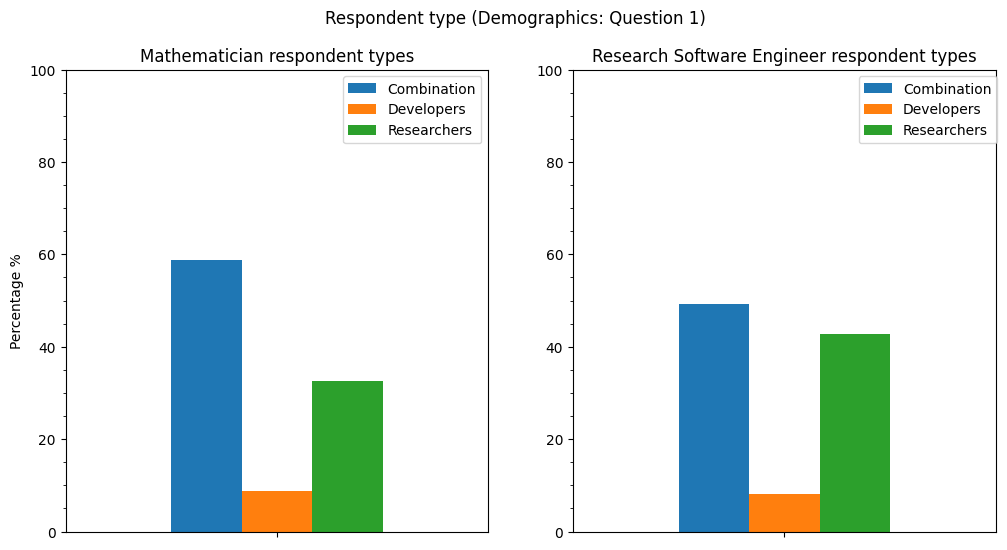

In [56]:
questionID = "Q0.1"
title = "Respondent type (Demographics: Question 1)"
IRSEMsubtitle = "Mathematician respondent types"
URSSIsubtitle = "Research Software Engineer respondent types"
statement = ""

# print raw data
print_question(questionID=questionID)

# graph question
graph_question(questionID=questionID, title=title, IRSEMsubtitle=IRSEMsubtitle, URSSIsubtitle=URSSIsubtitle, statement=statement,
               percentage=True, stacked=False)

##### Q0.2: What type of organization do you work for?

Educational institution

National lab

Industry

Other

                         IRSEM survey: counts  percentages
Q0.2                                                      
Educational institution                  35.0         0.76
Other:                                    5.0         0.11
Industry                                  5.0         0.11
National lab                              1.0         0.02
TOTAL:                                   46.0         1.00

 - - - - -

                         URSSI survey: counts  percentages
Q0.2                                                      
Educational institution                 901.0         0.86
National lab                             62.0         0.06
Other                                    49.0         0.05
Industry                                 39.0         0.04
TOTAL:                                 1051.0         1.01


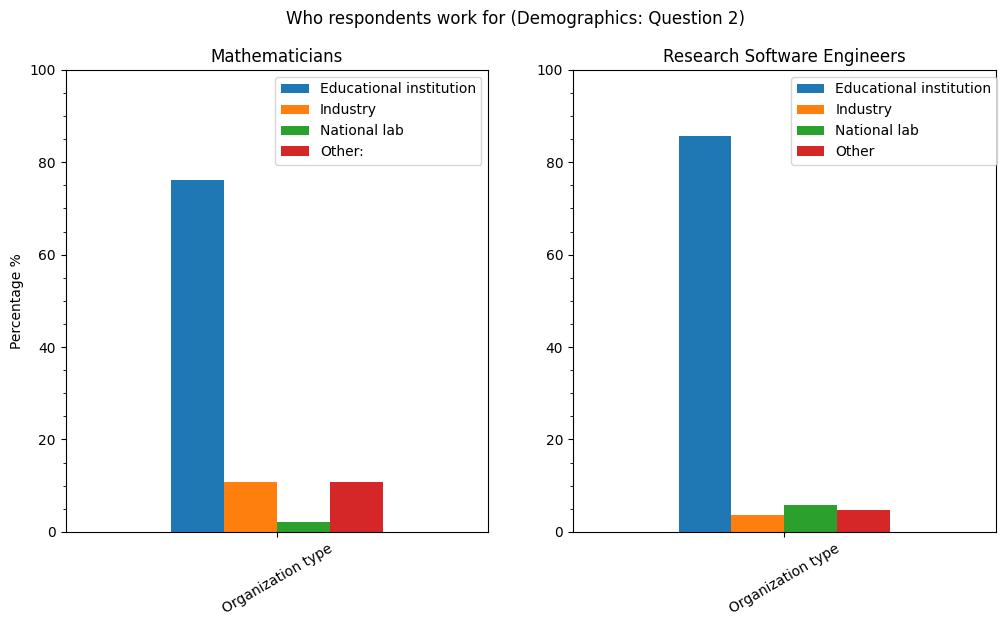

In [92]:
questionID = "Q0.2"
title = "Who respondents work for (Demographics: Question 2)"
IRSEMsubtitle = "Mathematicians"
URSSIsubtitle = "Research Software Engineers"
statement = "Organization type"

# print raw data
print_question(questionID=questionID)

# graph question
graph_question(questionID=questionID, title=title, IRSEMsubtitle=IRSEMsubtitle, URSSIsubtitle=URSSIsubtitle, statement=statement,
               percentage=True, stacked=False, labelrotation=30)

##### Q0.3: In which country do you currently reside?

In [58]:
print_question("Q0.3")

                                                    IRSEM survey: counts  \
Q0.3                                                                       
United States of America                                            28.0   
Germany                                                              4.0   
France                                                               2.0   
Austria                                                              2.0   
Canada                                                               2.0   
Italy                                                                2.0   
Switzerland                                                          1.0   
Colombia                                                             1.0   
South Korea                                                          1.0   
United Kingdom of Great Britain and Northern Ir...                   1.0   
Australia                                                            1.0   
Israel      

##### Q0.4: What is your professional title?

Postdoc

Graduate Student

Research Engineer

Research Faculty

Research Software Engineer

Manager

Other

                            IRSEM survey: counts  percentages
Q0.4                                                         
Faculty                                     17.0         0.37
Postdoc                                      9.0         0.20
Graduate Student                             8.0         0.17
Other                                        6.0         0.13
Research Software Engineer                   3.0         0.07
Research Faculty                             2.0         0.04
Research Engineer                            1.0         0.02
TOTAL:                                      46.0         1.00

 - - - - -

                            URSSI survey: counts  percentages
Q0.4                                                         
Faculty                                    669.0         0.64
Other                                      149.0         0.14
Research Faculty                            59.0         0.06
Research Software Engineer                  43.0         

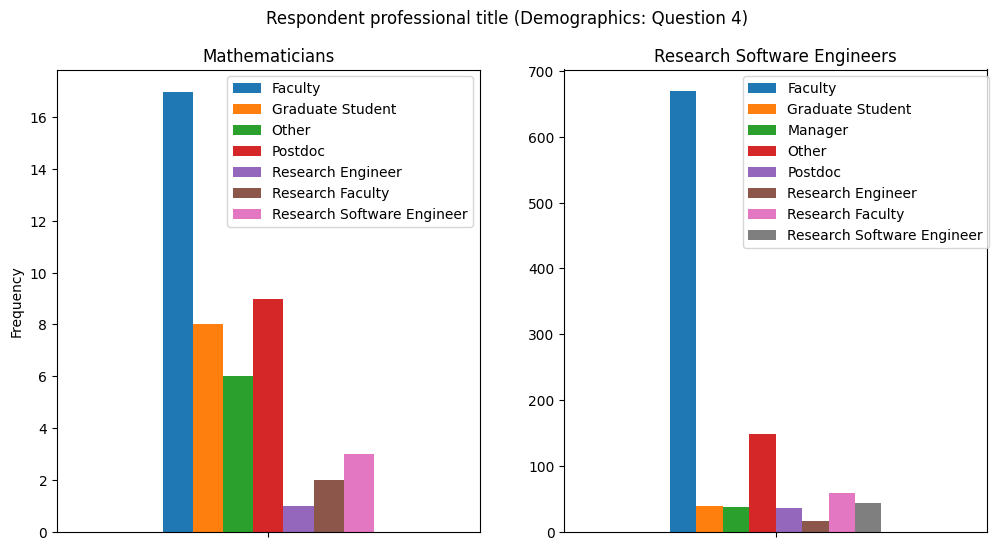

In [96]:
questionID = "Q0.4"
title = "Respondent professional title (Demographics: Question 4)"
IRSEMsubtitle = "Mathematicians"
URSSIsubtitle = "Research Software Engineers"
statement = ""

# print raw data
print_question(questionID=questionID)

# graph question
graph_question(questionID=questionID, title=title, IRSEMsubtitle=IRSEMsubtitle, URSSIsubtitle=URSSIsubtitle, statement=statement,
               percentage=False, stacked=False, labelrotation=30)

##### Q0.5: What is you age?

19 - 24

25 - 34

35 - 44

45 - 54

55 - 64

65 - 74

75 - 84

85 or older

         IRSEM survey: counts  percentages
Q0.5                                      
35 - 44                  21.0         0.46
25 - 34                  15.0         0.33
19 - 24                   3.0         0.07
45 - 54                   3.0         0.07
65 - 74                   2.0         0.04
55 - 64                   1.0         0.02
75 - 84                   1.0         0.02
TOTAL:                   46.0         1.01

 - - - - -

             URSSI survey: counts  percentages
Q0.5                                          
35 - 44                     366.0         0.35
45 - 54                     254.0         0.24
55 - 64                     184.0         0.18
25 - 34                     162.0         0.16
65 - 74                      53.0         0.05
18 - 24                      10.0         0.01
75 - 84                       8.0         0.01
85 or older                   1.0         0.00
TOTAL:                     1038.0         1.00


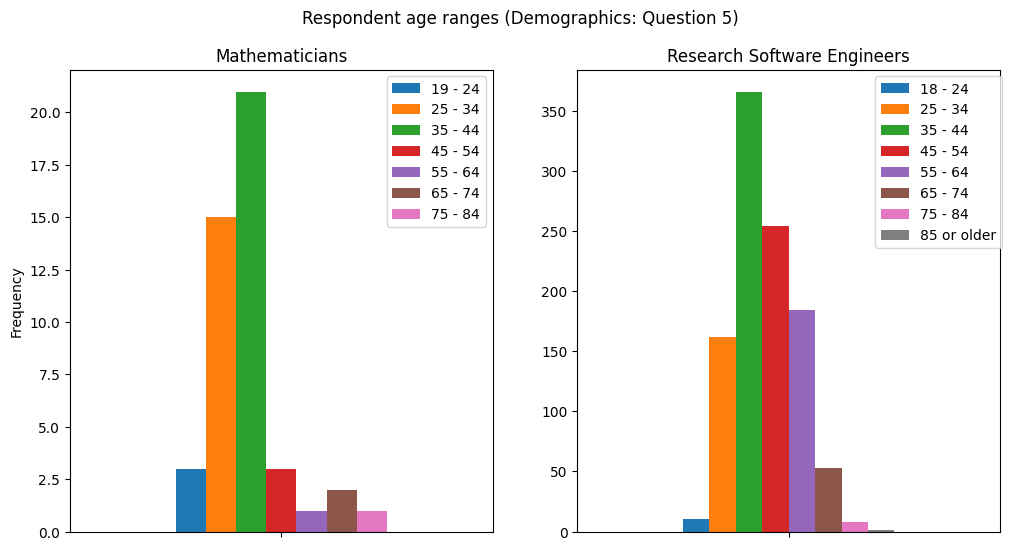

In [94]:
questionID = "Q0.5"
title = "Respondent age ranges (Demographics: Question 5)"
IRSEMsubtitle = "Mathematicians"
URSSIsubtitle = "Research Software Engineers"
statement = ""

# print raw data
print_question(questionID=questionID)

# graph question
graph_question(questionID=questionID, title=title, IRSEMsubtitle=IRSEMsubtitle, URSSIsubtitle=URSSIsubtitle, statement=statement,
               percentage=False, stacked=False, labelrotation=30)

##### Q0.6: How many years have you worked in research?

Less than 1 year

1 - 5 years

6 - 10 years

11 - 15 years

16 - 20 years

20 or more years

In [101]:
questionID = "Q0.6"
title = "Respondent experience (Demographics: Question 6)"
IRSEMsubtitle = "Mathematicians"
URSSIsubtitle = "Research Software Engineers"
statement = ""

# print raw data
print_question(questionID=questionID)

# graph question
#graph_question(questionID=questionID, title=title, IRSEMsubtitle=IRSEMsubtitle, URSSIsubtitle=URSSIsubtitle, statement=statement,
#               percentage=False, stacked=False, labelrotation=30)

                  IRSEM survey: counts  percentages
Q0.6                                               
11 - 15 years                     11.0         0.24
1 - 5 years                       11.0         0.24
6 - 10 years                       9.0         0.20
20 or more years                   6.0         0.13
16 - 20 years                      5.0         0.11
Less than 1 year                   4.0         0.09
TOTAL:                            46.0         1.01

 - - - - -

                    URSSI survey: counts  percentages
Q0.6                                                 
More than 20 years                 410.0         0.39
11 - 15 years                      212.0         0.20
16-20 years                        178.0         0.17
6 - 10 years                       162.0         0.16
1 - 5 years                         76.0         0.07
Less than 1 year                     5.0         0.00
TOTAL:                            1043.0         0.99


##### Q0.7: What is your gender?

Male

Female

Non-binary / third gender

Prefer not to say

In [62]:
print_question("Q0.7")

                   IRSEM survey: counts  percentages
Q0.7                                                
Male                               39.0         0.85
Female                              6.0         0.13
Prefer not to say                   1.0         0.02
TOTAL:                             46.0         1.00

 - - - - -

                      URSSI survey: counts  percentages
Q0.7                                                   
Male                                 734.0         0.70
Female                               268.0         0.26
Prefer not to answer                  36.0         0.03
Other                                  4.0         0.00
TOTAL:                              1042.0         0.99


##### Q0.8: How often do you work on projects that have the following team size?

|                   | Never | Sometimes | About half the time | Most of the time | Always |
| ----------------- | - | - | - | - | - |
| **1 person**      | o | o | o | o | o |
| **2 - 5 people**  | o | o | o | o | o |
| **6 - 20 people** | o | o | o | o | o |
| **20+ people**    | o | o | o | o | o |

1 Person:

                     IRSEM survey: counts  percentages
Q0.8_1                                                
Sometimes                            22.0         0.48
Most of the time                     10.0         0.22
About half the time                   9.0         0.20
Never                                 4.0         0.09
Always                                1.0         0.02
TOTAL:                               46.0         1.01

 - - - - -

                     URSSI survey: counts  percentages
Q0.8_1                                                
Sometimes                           477.0         0.52
About half the time                 150.0         0.16
Most of the time                    120.0         0.13
Never                               115.0         0.13
Always                               55.0         0.06
TOTAL:                              917.0         1.00

 _________________________________________________________ 

2 - 5 people:

                   

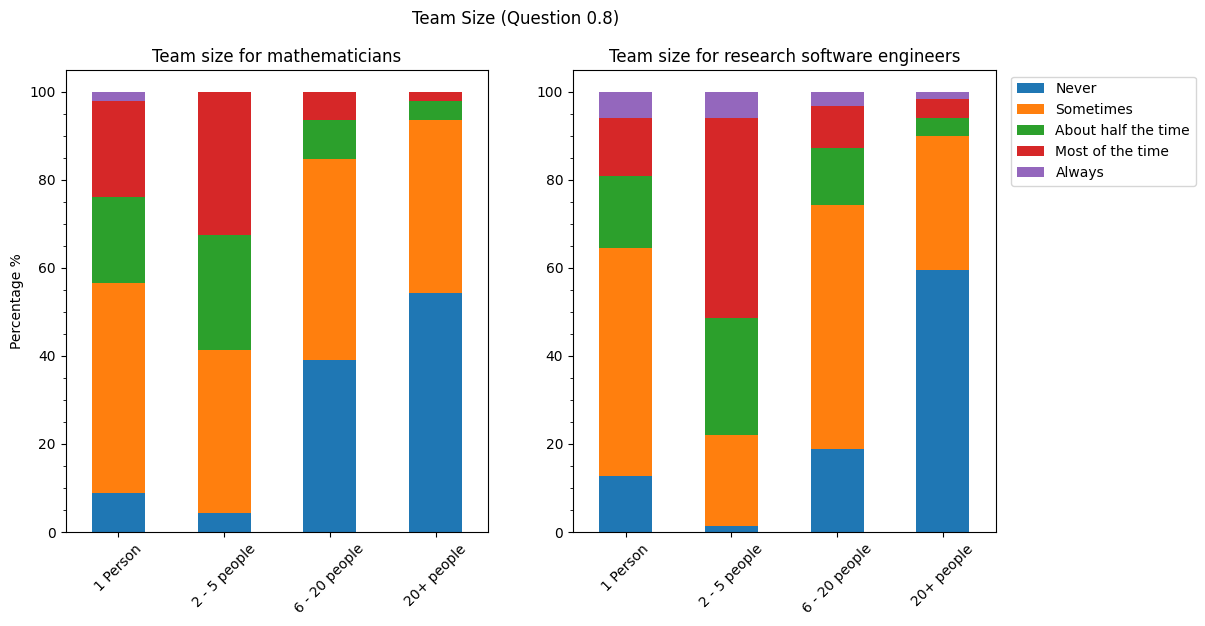

In [63]:
questionID = "Q0.8"
title = 'Team Size (Question 0.8)'
figtitle1 = 'Team size for mathematicians'
figtitle2 = 'Team size for research software engineers'
STATEMENTS = ["1 Person", 
              "2 - 5 people", 
              "6 - 20 people", 
              "20+ people"]
ANSWERS = ['Never',
           'Sometimes',
           'About half the time',
           'Most of the time',
           'Always']


# print raw data
print_question_set(question=questionID, statements=STATEMENTS)
graph_likert_matrix(questionID=questionID, title=title, IRSEMsubtitle=figtitle1, URSSIsubtitle=figtitle2, statements=STATEMENTS, answers=ANSWERS, percentage=True)


# RQ1: Software Development Practices
What activities do research software developers spend their time on, and how does this impact the perceived quality and long-term accessibility of research software?

For the following questions, think about your most recently completed software project and answer based on your experiences in that project.

[Note: This section only appears for respondent types “Developer” or “Combination”]

##### Q1.1: To what extent was the software targeted at each of these groups of users?

|                              | Not at all | Secondary target | Primary target |
| ---------------------------- | - | - | - |
| **Just me**                  | o | o | o |
| **Just my team**             | o | o | o |
| **Just my discipline**       | o | o | o |
| **More than one discipline** | o | o | o |

Just me:

                  IRSEM survey: counts  percentages
Q1.1_1                                             
Not at all                         9.0         0.41
Primary target                     9.0         0.41
Secondary target                   4.0         0.18
TOTAL:                            22.0         1.00

 - - - - -

                  URSSI survey: counts  percentages
Q1.1_1                                             
Not at all                       156.0         0.38
Primary target                   133.0         0.32
Secondary target                 122.0         0.30
TOTAL:                           411.0         1.00

 _________________________________________________________ 

Just my team:

                  IRSEM survey: counts  percentages
Q1.1_2                                             
Secondary target                  11.0         0.50
Not at all                        10.0         0.45
Primary target                     1.0         0.05
TOTAL:          

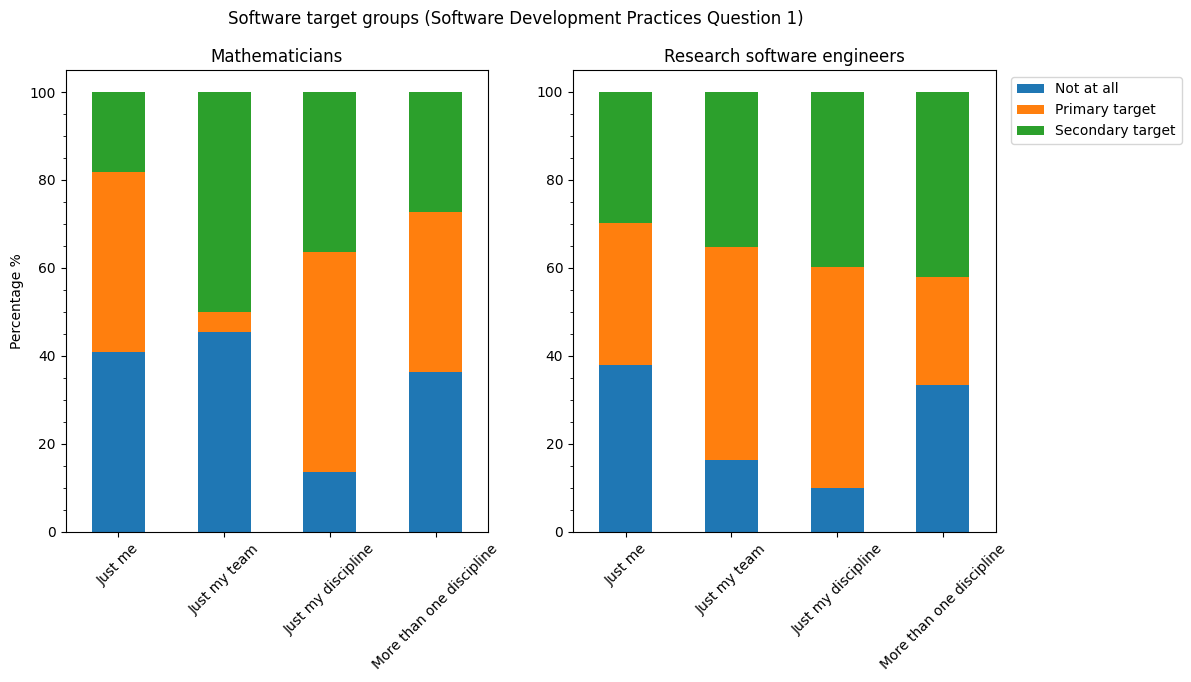

In [64]:
print_question_set("Q1.1", ["Just me", 
                            "Just my team", 
                            "Just my discipline", 
                            "More than one discipline"])

questionID = "Q1.1"
title = 'Software target groups (Software Development Practices Question 1)'
figtitle1 = 'Mathematicians'
figtitle2 = 'Research software engineers'
STATEMENTS = ["Just me", 
              "Just my team", 
              "Just my discipline", 
              "More than one discipline"]
ANSWERS = ['Not at all',
           'Primary target',
           'Secondary target']


# print raw data
print_question_set(question=questionID, statements=STATEMENTS)
graph_likert_matrix(questionID=questionID, title=title, IRSEMsubtitle=figtitle1, URSSIsubtitle=figtitle2, statements=STATEMENTS, answers=ANSWERS, percentage=True)

##### Q1.2: What percent of your time did you actually spend in the following activities? *(total should be 100%)*

Requirements gathering / documentation:

Software architecture / design:

Coding:

Testing:

Debugging:

Maintenance:

Documentation:

Meetings:

Training:

Other:

In [65]:
#TODO

##### Q1.3: What percent of time would you have <u>**liked**</u> to have spent in each activity? *(total should be 100%)*

Requirements gathering / documentation:

Software architecture / design:

Coding:

Testing:

Debugging:

Maintenance:

Documentation:

Meetings:

Training:

Other:

In [66]:
#TODO

##### Q1.4: Which of the following types of testing did you employ?

|                 | Frequently | Somewhat | Rarely | Never |
| --------------- | - | - | - | - |
| **Unit**        | o | o | o | o |
| **Integration** | o | o | o | o |
| **System**      | o | o | o | o |
| **User**        | o | o | o | o |
| **Regression**  | o | o | o | o |

Unit:

            IRSEM survey: counts  percentages
Q1.4_1                                       
Frequently                   9.0         0.41
Somewhat                     6.0         0.27
Rarely                       4.0         0.18
Never                        3.0         0.14
TOTAL:                      22.0         1.00

 - - - - -

            URSSI survey: counts  percentages
Q1.4_1                                       
Frequently                 231.0         0.51
Somewhat                   108.0         0.24
Rarely                      62.0         0.14
Never                       52.0         0.11
TOTAL:                     453.0         1.00

 _________________________________________________________ 

Integration:

            IRSEM survey: counts  percentages
Q1.4_2                                       
Frequently                  10.0         0.45
Somewhat                     6.0         0.27
Never                        4.0         0.18
Rarely                       2

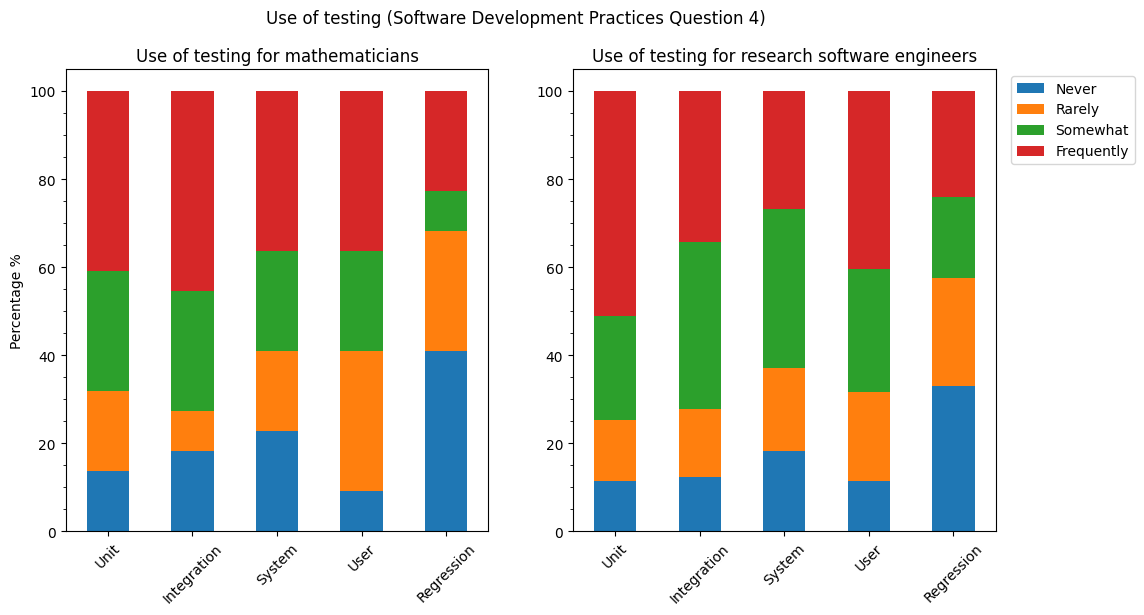

In [67]:
questionID = "Q1.4"
title = 'Use of testing (Software Development Practices Question 4)'
figtitle1 = 'Use of testing for mathematicians'
figtitle2 = 'Use of testing for research software engineers'
STATEMENTS = ["Unit", 
              "Integration", 
              "System", 
              "User", 
              "Regression"]
ANSWERS = ['Never',
           'Rarely',
           'Somewhat',
           'Frequently']

# print raw data
print_question_set(question=questionID, statements=STATEMENTS)
graph_likert_matrix(questionID=questionID, title=title, IRSEMsubtitle=figtitle1, URSSIsubtitle=figtitle2, statements=STATEMENTS, answers=ANSWERS, percentage=True)

##### Q1.5: Did you release the software under an open-source license?
Yes / No

        IRSEM survey: counts  percentages
Q1.5                                     
Yes                     21.0         0.95
No                       1.0         0.05
TOTAL:                  22.0         1.00

 - - - - -

        URSSI survey: counts  percentages
Q1.5                                     
Yes                    349.0         0.74
No                     122.0         0.26
TOTAL:                 471.0         1.00


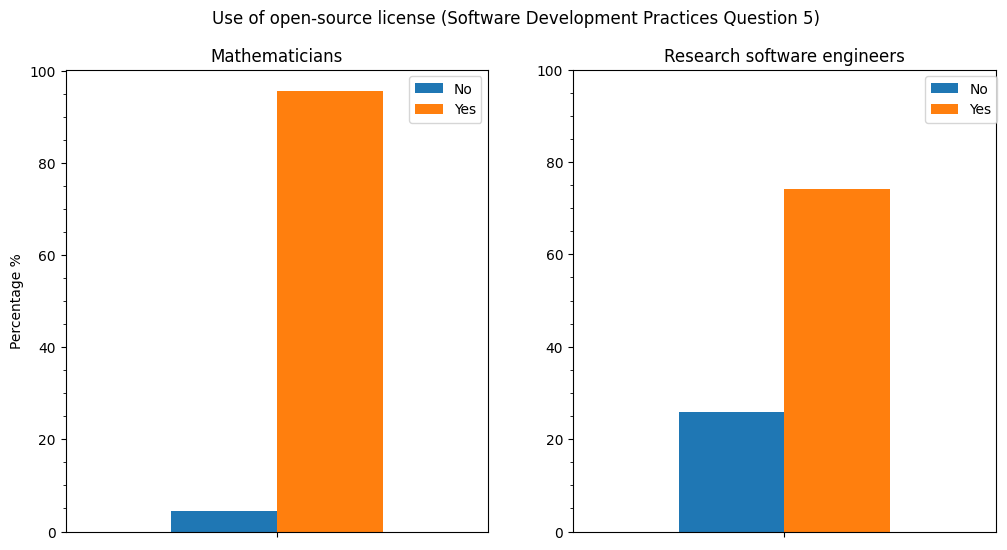

In [68]:
print_question('Q1.5')
graph_question(questionID='Q1.5', 
               title='Use of open-source license (Software Development Practices Question 5)',
               IRSEMsubtitle= 'Mathematicians',
               URSSIsubtitle= 'Research software engineers',
               statement= '' )

# RQ2: Development Infrastructure and Tools
What tools do research software developers use and what additional tools are needed to support sustainable development practices?

[Note: This section only appears for respondent types “Developer” or “Combination”]

The following questions are about software development infrastructure, tools, and practices with which you may use or are familiar.

##### Q2.1: In the last 5 years, how much experience do you have with each of the following types of projects:

|     | None | 1-3 projects | 4+ projects |
| --- | - | - | - |
| <strong>Single developer</strong> | o | o | o |
| <strong>Co-located team </strong>(i.e. a team, located in a single place or institution with well-coordinated funding/organization) | o | o | o |
| <strong>Distributed team</strong> (i.e. a well-defined team, located in multiple places or institutions with well-coordinated funding/organization) | o | o | o |
| <strong>Open-source community</strong> (i.e. a group of developers who are distributed and working under multiple independant funding sources) | o | o | o |

Single developer:

              IRSEM survey: counts  percentages
Q2.1_1                                         
1-3 projects                  11.0         0.58
4+ projects                    8.0         0.42
TOTAL:                        19.0         1.00

 - - - - -

              URSSI survey: counts  percentages
Q2.1_1                                         
1-3 projects                 222.0         0.69
4+ projects                  100.0         0.31
TOTAL:                       322.0         1.00

 _________________________________________________________ 

Co-located team:

              IRSEM survey: counts  percentages
Q2.1_2                                         
1-3 projects                  11.0         0.73
4+ projects                    4.0         0.27
TOTAL:                        15.0         1.00

 - - - - -

              URSSI survey: counts  percentages
Q2.1_2                                         
1-3 projects                 260.0         0.73
4+ projects

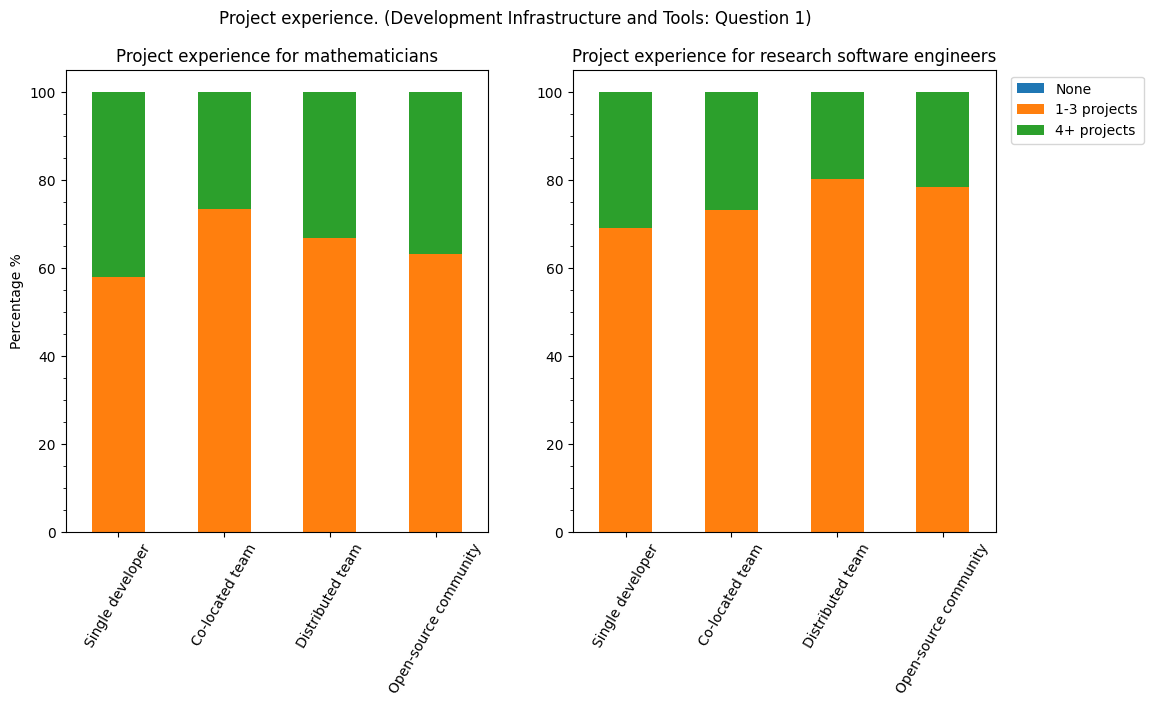

In [69]:
questionID = "Q2.1"
title = 'Project experience. (Development Infrastructure and Tools: Question 1)'
figtitle1 = 'Project experience for mathematicians'
figtitle2 = 'Project experience for research software engineers'
STATEMENTS = ["Single developer", 
              "Co-located team",
              "Distributed team",
              "Open-source community"]
ANSWERS = ['None',
           '1-3 projects',
           '4+ projects']

# print raw data
print_question_set(question=questionID, statements=STATEMENTS)
graph_likert_matrix(questionID=questionID, title=title, IRSEMsubtitle=figtitle1, URSSIsubtitle=figtitle2, statements=STATEMENTS, answers=ANSWERS, labelrotation=60)

##### Q2.2: How well do current tools support each of the following activities?

|   | Extremely supported | Very supported | Moderately supported | Slightly supported | Not supported at all |
| - | - | - | - | - | - |
| **Requirements gathering / documentation** | o | o | o | o | o |
| **Software architecture / design** | o | o | o | o | o |
| **Coding** | o | o | o | o | o |
| **Testing** | o | o | o | o | o |
| **Debugging** | o | o | o | o | o |
| **Maintenance** | o | o | o | o | o |
| **Documentation** | o | o | o | o | o |

Figure 4: Availability of tool support. (Question 2.2)

Requirements:

                      IRSEM survey: counts  percentages
Q2.2_1                                                 
Moderately supported                   9.0         0.45
Slightly supported                     6.0         0.30
Very supported                         2.0         0.10
Not supported at all                   2.0         0.10
Extremely supported                    1.0         0.05
TOTAL:                                20.0         1.00

 - - - - -

                      URSSI survey: counts  percentages
Q2.2_1                                                 
Slightly supported                   155.0         0.36
Moderately supported                 127.0         0.29
Not supported at all                  91.0         0.21
Very supported                        51.0         0.12
Extremely supported                   11.0         0.03
TOTAL:                               435.0         1.01

 _________________________________________________________ 

SW Arch/Design

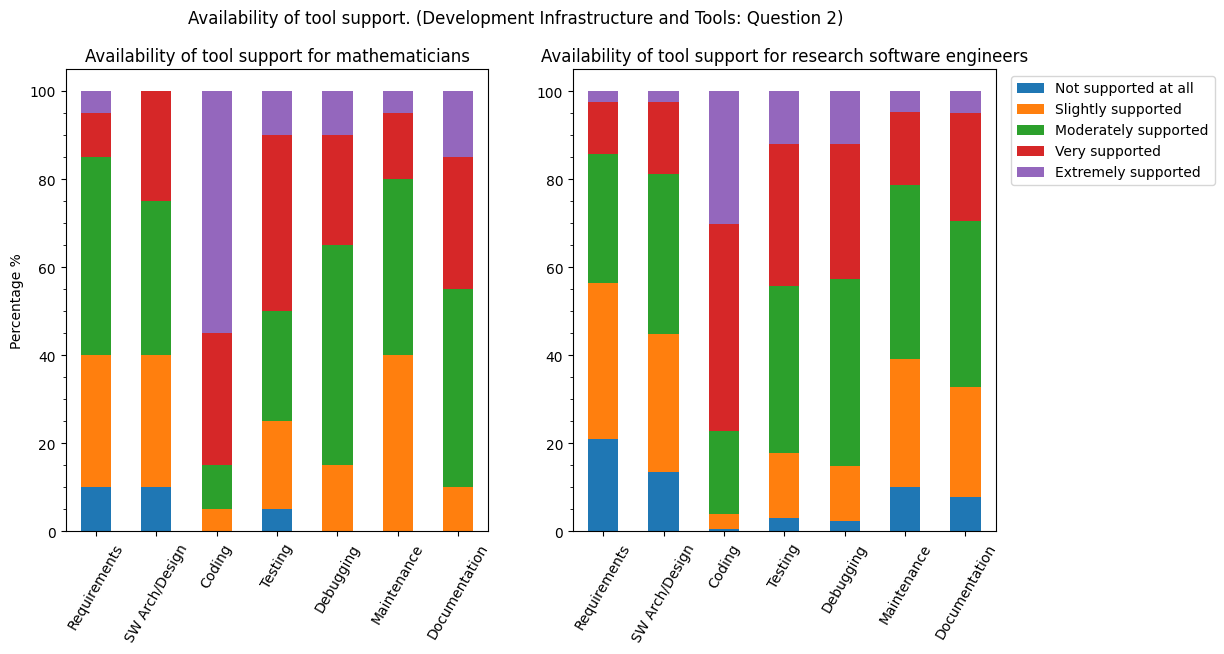

In [70]:

questionID = "Q2.2"
title = 'Availability of tool support. (Development Infrastructure and Tools: Question 2)'
figtitle1 = 'Availability of tool support for mathematicians'
figtitle2 = 'Availability of tool support for research software engineers'
STATEMENTS = ['Requirements', 
              'SW Arch/Design', 
              'Coding', 
              'Testing',
              'Debugging',
              'Maintenance',
              'Documentation']
ANSWERS = ['Not supported at all',
           'Slightly supported',
           'Moderately supported',
           'Very supported', 
           'Extremely supported']

# print raw data
print_question_set(question=questionID, statements=STATEMENTS)
graph_likert_matrix(questionID=questionID, title=title, IRSEMsubtitle=figtitle1, URSSIsubtitle=figtitle2, statements=STATEMENTS, answers=ANSWERS, labelrotation=60)


# RQ3: Training
What training is available to research software developers and does this training meet their needs?

The following questions are aimed to help us understand where developers may have recaived formal or informal training for software development. 

##### Q3.1: Have you received training for software development?
Yes / No

In [71]:
print_question("Q3.1")

        IRSEM survey: counts  percentages
Q3.1                                     
No                      21.0         0.58
Yes                     15.0         0.42
TOTAL:                  36.0         1.00

 - - - - -

        URSSI survey: counts  percentages
Q3.1                                     
No                     567.0         0.65
Yes                    302.0         0.35
TOTAL:                 869.0         1.00


##### Q3.1.1: Where? (if answered yes to 3.1)

**Multiple select:**

Class / school

Carpentry

Online self-directed

Other

In [72]:
print_question("Q3.1.1")

                                     IRSEM survey: counts  percentages
Q3.1.1                                                                
Class / school,Online self-directed                   6.0         0.40
Class / school                                        6.0         0.40
Online self-directed,Other                            1.0         0.07
Online self-directed                                  1.0         0.07
Other                                                 1.0         0.07
TOTAL:                                               15.0         1.01

 - - - - -

                                               URSSI survey: counts  \
Q3.1.1                                                                
Class / school                                                115.0   
Class / school,Online self-directed                            92.0   
Online self-directed                                           22.0   
Other                                                          1

##### Q3.2: Do you believe there are sufficient opportunities available for exploring or obtaining new software skills?
Yes / No / Don't know

In [73]:
print_question("Q3.2")

            IRSEM survey: counts  percentages
Q3.2                                         
Yes                         19.0         0.53
No                          10.0         0.28
Don't know                   7.0         0.19
TOTAL:                      36.0         1.00

 - - - - -

            URSSI survey: counts  percentages
Q3.2                                         
Yes                        451.0         0.52
No                         233.0         0.27
Don't know                 181.0         0.21
TOTAL:                     865.0         1.00


##### Q3.3: Do you have sufficient time to take the types of training you need to be successful?
Yes / No

In [74]:
print_question("Q3.3")

        IRSEM survey: counts  percentages
Q3.3                                     
Yes                     18.0          0.5
No                      18.0          0.5
TOTAL:                  36.0          1.0

 - - - - -

        URSSI survey: counts  percentages
Q3.3                                     
No                     642.0         0.74
Yes                    222.0         0.26
TOTAL:                 864.0         1.00


##### Q3.4: For each of the following types of training (languages, development techniques, and project management), which mode of delivery do you prefer? Please select your top two modes of delivery preferences for each of the training types.

|   | Languages | Development techniques | Project Management|
| - | - | - | - | 
| **On-site custom training** | ▢ | ▢ | ▢ |
| **Workshops or short courses <em>(e.g.</em>, before or after a conference)** | ▢ | ▢ | ▢ |
| **Carpentries / software boot camps** | ▢ | ▢ | ▢ |
| **Summer schools (in-person or virtual)** | ▢ | ▢ | ▢ |
| **MOOCs (Massive Open Online Courses), webinars, or self-directed online courses** | ▢ | ▢ | ▢ |
| **Other** | ▢ | ▢ | ▢ |

In [75]:
questionID = "Q3.4"
title = 'Preferred training. (Training: Question 4)'
figtitle1 = 'Preferred training for mathematicians'
figtitle2 = 'Preferred training for research software engineers'
STATEMENTS = ["On-site custom training", 
              "Workshops/short courses", 
              "Carpentries/software boot camps", 
              "Summer schools", 
              "MOOCs/webinars/online courses",
              "Other"]
ANSWERS = ['Languages', 
           'Development Techniques',
           'Development techniques', 
           'Project Management']

# print raw data
print_question_set(question=questionID, statements=STATEMENTS)
#graph_likert_matrix(questionID=questionID, title=title, IRSEMsubtitle=figtitle1, URSSIsubtitle=figtitle2, statements=STATEMENTS, answers=ANSWERS, percentage=True)

On-site custom training:

                                                    IRSEM survey: counts  \
Q3.4_1                                                                     
Languages,Development techniques                                     8.0   
Languages,Development techniques,Project Manage...                   5.0   
Development techniques,Project Management                            5.0   
Project Management                                                   4.0   
Languages                                                            2.0   
TOTAL:                                                              24.0   

                                                    percentages  
Q3.4_1                                                           
Languages,Development techniques                           0.33  
Languages,Development techniques,Project Manage...         0.21  
Development techniques,Project Management                  0.21  
Project Management                 

# RQ4: Funding and Institutional Support
**RQ4a: What is the available institutional support for research software development?**

**RQ4b: What sources of institutional funding are available to research software developers?**

The following questions are aimed at understanding your funding and institutional support for research software activities.

##### Q4.1: Have you ever included costs for software development in a funding proposal?
Yes / No

In [76]:
print_question("Q4.1")

        IRSEM survey: counts  percentages
Q4.1                                     
No                      28.0         0.78
Yes                      8.0         0.22
TOTAL:                  36.0         1.00

 - - - - -

        URSSI survey: counts  percentages
Q4.1                                     
No                     451.0         0.54
Yes                    385.0         0.46
TOTAL:                 836.0         1.00


##### Q4.1.1: Select all costs for software development in your funding proposals? (if answered yes to 4.1)
**Multiple Choice:**

For developing new software

For reusing existing software

For maintaining / sustaining software

In [77]:
print_question("Q4.1.1")

                                                    IRSEM survey: counts  \
Q4.1.1                                                                     
For developing new software                                          4.0   
For maintaining / sustaining software                                2.0   
For developing new software,For maintaining / s...                   2.0   
TOTAL:                                                               8.0   

                                                    percentages  
Q4.1.1                                                           
For developing new software                                0.50  
For maintaining / sustaining software                      0.25  
For developing new software,For maintaining / s...         0.25  
TOTAL:                                                     1.00  

 - - - - -

                                                    URSSI survey: counts  \
Q4.1.1                                                    

##### Q4.2: What percent of the funding for your software work comes from each of the following? (if Developer or Combination selected) *(total should be 100%)*

NSF:

NIH:

DoD:

NASA:

NOAA:

Your own institution (e.g. faculty salary)

Other:



In [78]:
#TODO

##### Q4.3: Does your institution provide support for your research software development activities in the following ways: (if Developer or Combination selected)

|   | No | Yes, but inadequate level of support | Yes, adequate level of support |
| - | - | - | - |
| **Financial** | o | o | o |
| **Infrastructural (repositories, computing, etc.)** | o | o | o |
| **Consulting / RSE support** | o | o | o |
| **Other** | o | o | o |

Financial:

                                      IRSEM survey: counts  percentages
Q4.3_1                                                                 
Yes, adequate level of support                         8.0         0.42
No                                                     7.0         0.37
Yes, but inadequate level of support                   4.0         0.21
TOTAL:                                                19.0         1.00

 - - - - -

                                      URSSI survey: counts  percentages
Q4.3_1                                                                 
No                                                   250.0         0.60
Yes, but inadequate level of support                 110.0         0.26
Yes, adequate level of support                        60.0         0.14
TOTAL:                                               420.0         1.00

 _________________________________________________________ 

Infrastructural:

                               

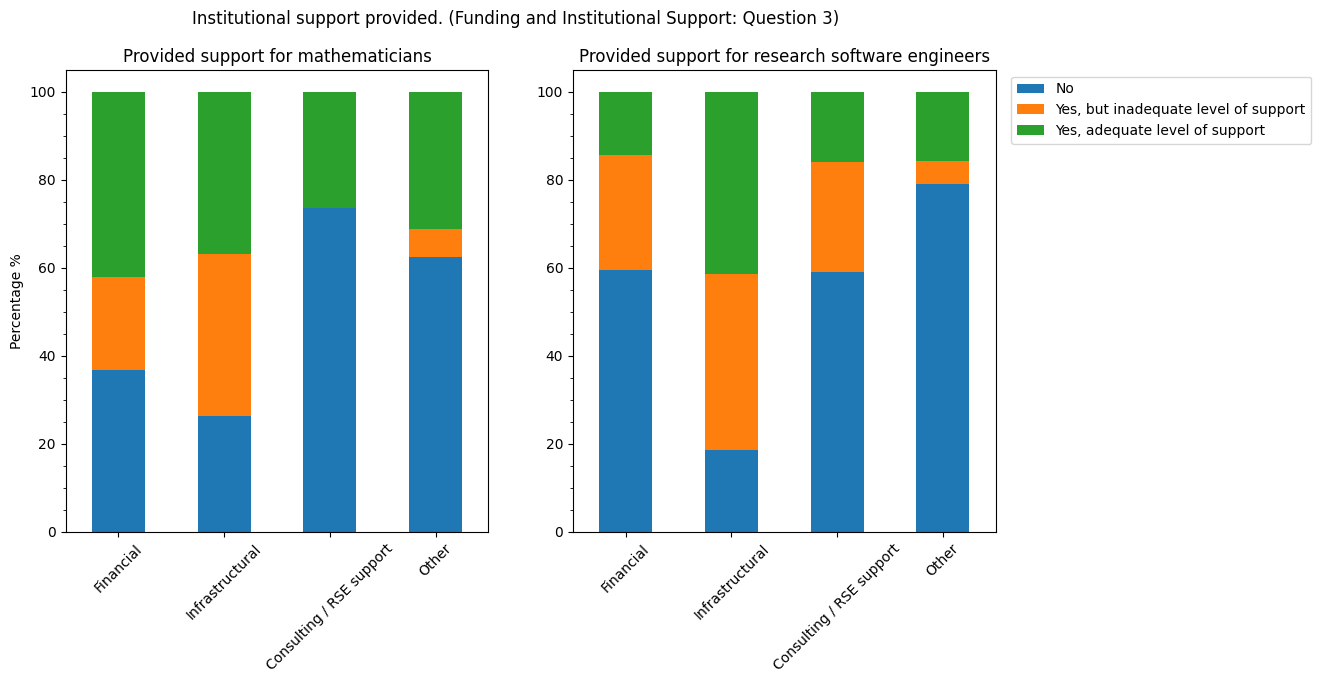

In [103]:
questionID = "Q4.3"
title = 'Institutional support provided. (Funding and Institutional Support: Question 3)'
figtitle1 = 'Provided support for mathematicians'
figtitle2 = 'Provided support for research software engineers'
STATEMENTS = ["Financial",
              "Infrastructural",
              "Consulting / RSE support",
              "Other"]
ANSWERS = ['No',
           'Yes, but inadequate level of support',
           'Yes, adequate level of support']

# print raw data
print_question_set(question=questionID, statements=STATEMENTS)
graph_likert_matrix(questionID=questionID, title=title, IRSEMsubtitle=figtitle1, URSSIsubtitle=figtitle2, statements=STATEMENTS, answers=ANSWERS, percentage=True)

##### Q4.4: Does your institution provide / support the research software development **<u>you need</u>** in the following ways: (if Developer or Combination selected)

|   | No | Yes, but inadequate level of support | Yes, adequate level of support |
| - | - | - | - |
| **Financial** | o | o | o |
| **Infrastructural (repositories, computing, etc.)** | o | o | o |
| **Consulting / RSE support** | o | o | o |
| **Other** | o | o | o |

Financial:

                                      IRSEM survey: counts  percentages
Q4.4_1                                                                 
No                                                     9.0         0.47
Yes, adequate level of support                         7.0         0.37
Yes, but inadequate level of support                   3.0         0.16
TOTAL:                                                19.0         1.00

 - - - - -

                                      URSSI survey: counts  percentages
Q4.4_1                                                                 
No                                                   240.0         0.64
Yes, but inadequate level of support                  77.0         0.21
Yes, adequate level of support                        56.0         0.15
TOTAL:                                               373.0         1.00

 _________________________________________________________ 

Infrastructural:

                               

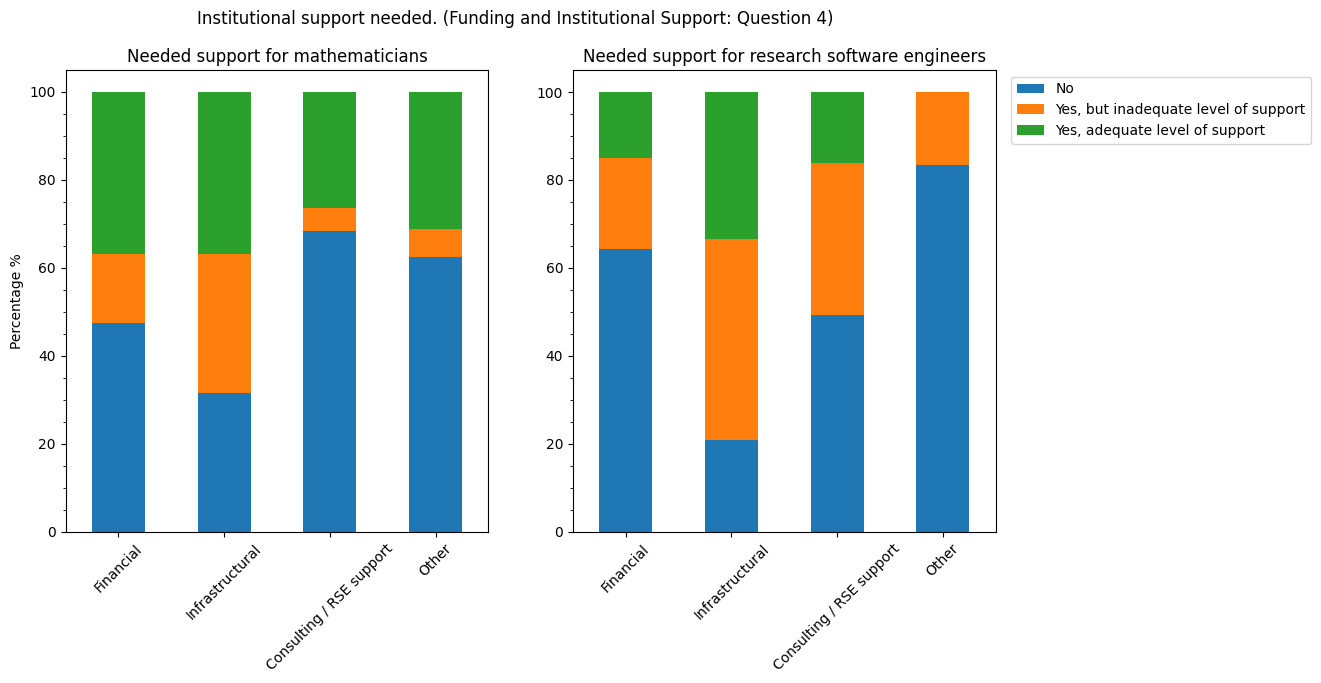

In [104]:
print_question_set("Q4.4", ["Financial",
                            "Infrastructural",
                            "Consulting / RSE support",
                            "Other"])


questionID = "Q4.4"
title = 'Institutional support needed. (Funding and Institutional Support: Question 4)'
figtitle1 = 'Needed support for mathematicians'
figtitle2 = 'Needed support for research software engineers'
STATEMENTS = ["Financial",
              "Infrastructural",
              "Consulting / RSE support",
              "Other"]
ANSWERS = ['No',
           'Yes, but inadequate level of support',
           'Yes, adequate level of support']

# print raw data
print_question_set(question=questionID, statements=STATEMENTS)
graph_likert_matrix(questionID=questionID, title=title, IRSEMsubtitle=figtitle1, URSSIsubtitle=figtitle2, statements=STATEMENTS, answers=ANSWERS, percentage=True)

##### Q4.5: What are the most significant gaps in your current institutional / organizational support of software related research?

# RQ5: Career Paths
What factors impact career advancement and hiring in research software?

The following questions are designed to provide information about career support and career pathways for research software developers.

##### Q5.1: In your institution, which of the following positions are available for people whose primary role is to develop research software?
**Multiple select:**

Postdoc

Research Software Engineer

Research Programmer

Software Developer

Programmer

Faculty

Research Faculty

Other

In [81]:
print_question("Q5.1")

                                                    IRSEM survey: counts  \
Q5.1                                                                       
Postdoc                                                              3.0   
Postdoc,Research Faculty                                             2.0   
Research Faculty                                                     2.0   
Postdoc,Faculty,Research Faculty                                     1.0   
Research Software Engineer                                           1.0   
Postdoc,Research Software Engineer,Research Fac...                   1.0   
Postdoc,Faculty                                                      1.0   
Research Software Engineer,Research Faculty                          1.0   
Postdoc,Research Software Engineer,Research Pro...                   1.0   
Postdoc,Other                                                        1.0   
Other                                                                1.0   
Research Sof

##### Q5.2: Is there opportunity for career advancement (e.g., tenure, more senior positions) for people whose primary role is to develop research software at your institution?

Yes - in my current institution

No - I would have to move to another institution\

Don’t know

In [82]:
print_question("Q5.2")

                                                  IRSEM survey: counts  \
Q5.2                                                                     
No - I would have to move to another institution                  17.0   
Yes - in my current institution                                    8.0   
Don’t know                                                         8.0   
TOTAL:                                                            33.0   

                                                  percentages  
Q5.2                                                           
No - I would have to move to another institution         0.52  
Yes - in my current institution                          0.24  
Don’t know                                               0.24  
TOTAL:                                                   1.00  

 - - - - -

                                                  URSSI survey: counts  \
Q5.2                                                                     
No - I wou

##### Q5.3: With regard to hiring and maintaining a highly qualified software development staff, how important are the following concerns? (if Developer or Combination selected)

|   | Not at all important | Slightly important | Moderately important | Very important | Extremely important |
| - | - | - | - | - | - |
| **Identifying a pipeline for future staff** | o | o | o | o | o |
| **Attracting staff from underrepresented groups (e.g., race, gender, ethnicity, etc.)** | o | o | o | o | o |
| **Availability of staff who can work across disciplines** | o | o | o | o | o |
| **Competing with industry for top performers** | o | o | o | o | o |
| **Offering a viable career path** | o | o | o | o | o |
| **Opportunities to outsource skilled work** | o | o | o | o | o |

Identifying a pipeline for future staff:

                      IRSEM survey: counts  percentages
Q5.3_1                                                 
Very important                         8.0         0.50
Moderately important                   4.0         0.25
Slightly important                     2.0         0.12
Extremely important                    1.0         0.06
Not at all important                   1.0         0.06
TOTAL:                                16.0         0.99

 - - - - -

                      URSSI survey: counts  percentages
Q5.3_1                                                 
Very important                       235.0         0.36
Moderately important                 206.0         0.31
Extremely important                   97.0         0.15
Slightly important                    72.0         0.11
Not at all important                  44.0         0.07
TOTAL:                               654.0         1.00

 _______________________________________________

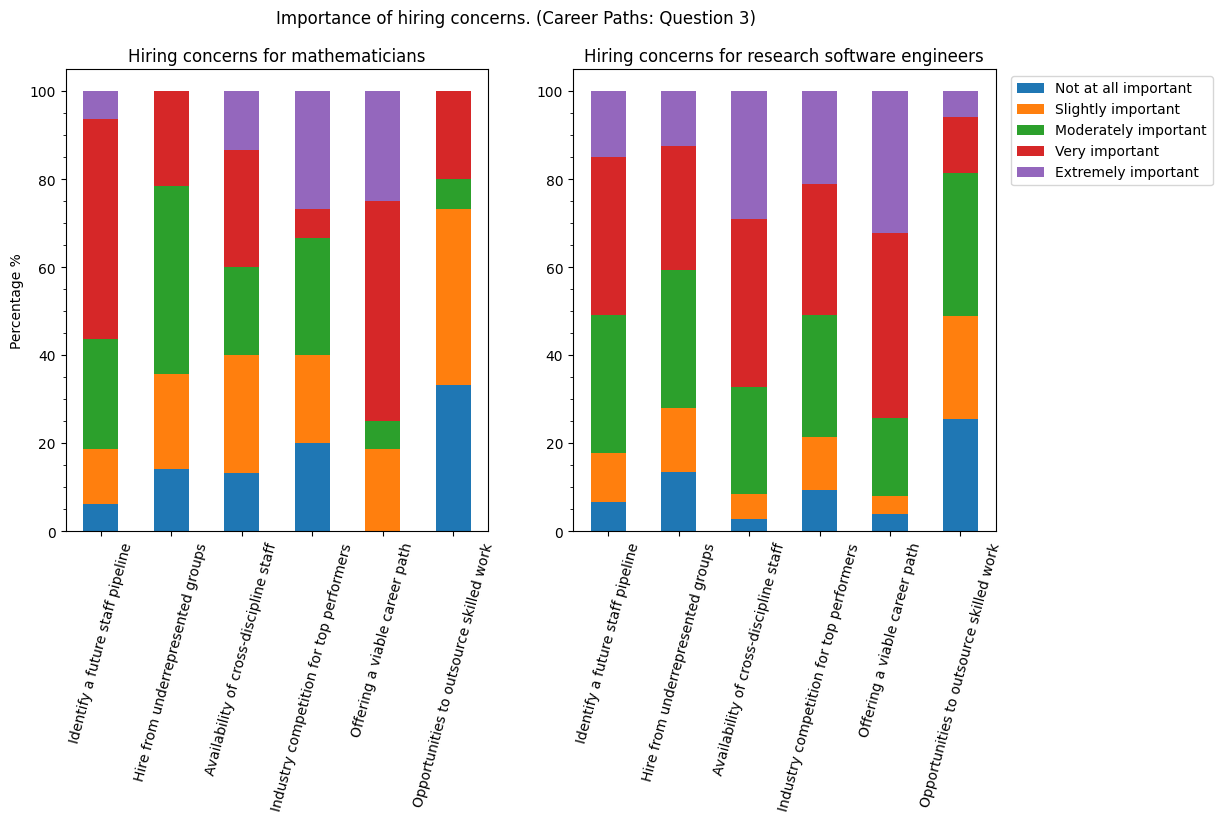

In [83]:
print_question_set("Q5.3", ["Identifying a pipeline for future staff",
                            "Attracting staff from underrepresented groups (e.g., race, gender, ethnicity, etc.)", 
                            "Availability of staff who can work across disciplines", 
                            "Competing with industry for top performers", 
                            "Offering a viable career path", 
                            "Opportunities to outsource skilled work"])

questionID = "Q5.3"
title = 'Importance of hiring concerns. (Career Paths: Question 3)'
figtitle1 = 'Hiring concerns for mathematicians'
figtitle2 = 'Hiring concerns for research software engineers'
STATEMENTS = ["Identify a future staff pipeline",
              "Hire from underrepresented groups", 
              "Availability of cross-discipline staff", 
              "Industry competition for top performers", 
              "Offering a viable career path", 
              "Opportunities to outsource skilled work"]
ANSWERS = ['Not at all important',
           'Slightly important',
           'Moderately important',
           'Very important',
           'Extremely important']

# print raw data
#print_question_set(question=questionID, statements=STATEMENTS)
graph_likert_matrix(questionID=questionID, title=title, IRSEMsubtitle=figtitle1, URSSIsubtitle=figtitle2, statements=STATEMENTS, answers=ANSWERS, labelrotation=75)

##### Q5.4: In your opinion: How important were the following concerns when you were hired into your current position? (if Developer or Combination selected)

|   | Not at all important | Slightly important | Moderately important | Very important | Extremely important |
| - | - | - | - | - | - |
| **Diversity in the organization (e.g., in terms of race, gender, ethnicity)** | o | o | o | o | o |
| **Your experience as programmer or software engineer** | o | o | o | o | o |
| **Your background in science** | o | o | o | o | o |
| **Your knowledge of diverse programming languages** | o | o | o | o | o |
| **Your knowledge and capabilities across disciplines** | o | o | o | o | o |
| **Your potential for growth** | o | o | o | o | o |

Diversity in the organization (e.g., in terms of race, gender, ethnicity):

                      IRSEM survey: counts  percentages
Q5.4_1                                                 
Not at all important                   7.0         0.44
Slightly important                     5.0         0.31
Moderately important                   3.0         0.19
Very important                         1.0         0.06
TOTAL:                                16.0         1.00

 - - - - -

                      URSSI survey: counts  percentages
Q5.4_1                                                 
Not at all important                 160.0         0.40
Moderately important                 108.0         0.27
Slightly important                    78.0         0.19
Very important                        41.0         0.10
Extremely important                   16.0         0.04
TOTAL:                               403.0         1.00

 _________________________________________________________ 

Your expe

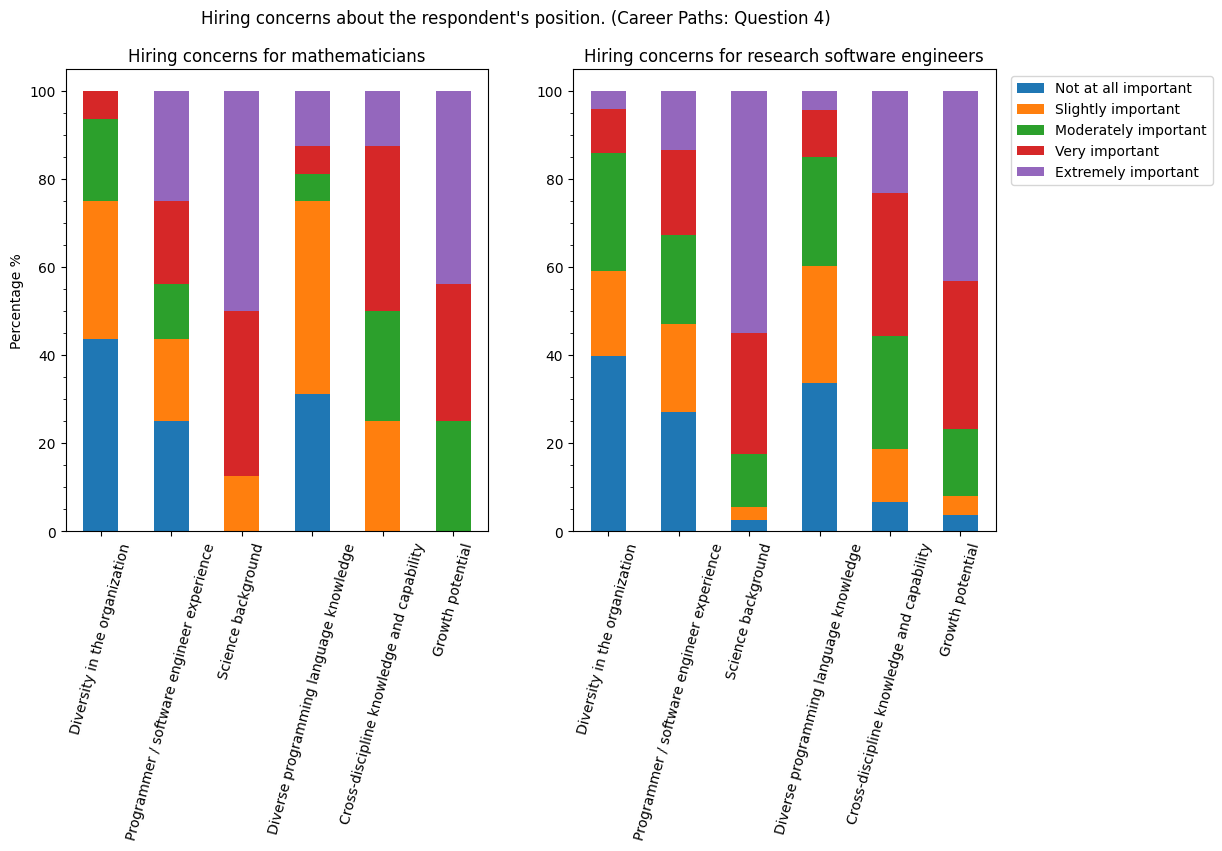

In [84]:
print_question_set("Q5.4", ["Diversity in the organization (e.g., in terms of race, gender, ethnicity)",
                            "Your experience as programmer or software engineer", 
                            "Your background in science", 
                            "Your knowledge of diverse programming languages", 
                            "Your knowledge and capabilities across disciplines", 
                            "Your potential for growth"])

questionID = "Q5.4"
title = 'Hiring concerns about the respondent\'s position. (Career Paths: Question 4)'
figtitle1 = 'Hiring concerns for mathematicians'
figtitle2 = 'Hiring concerns for research software engineers'
STATEMENTS = ["Diversity in the organization",
              "Programmer / software engineer experience", 
              "Science background", 
              "Diverse programming language knowledge", 
              "Cross-discipline knowledge and capability", 
              "Growth potential"]
ANSWERS = ['Not at all important',
           'Slightly important',
           'Moderately important',
           'Very important',
           'Extremely important']

# print raw data
#print_question_set(question=questionID, statements=STATEMENTS)
graph_likert_matrix(questionID=questionID, title=title, IRSEMsubtitle=figtitle1, URSSIsubtitle=figtitle2, statements=STATEMENTS, answers=ANSWERS, labelrotation=75)

# RQ6: Credit for Software Contributions
**RQ6a: What do research software projects require for crediting or attributing software use?**

**RQ6b: How are individuals and groups given institutional credit for developing research software?**

 This section elicits information about citation and attribution of research software.

##### Q6.1: When you write a paper and the work being described uses software, how often do you use each of the following approaches to mention the software?

|   | Never | Sometimes | About half the time | Most of the time | Always |
| - | - | - | - | - | - |
| **Cite paper about the software** | o | o | o | o | o |
| **Cite the software user’s manual** | o | o | o | o | o |
| **Mention the name of the software** | o | o | o | o | o |
| **Mention the URL of the software** | o | o | o | o | o |
| **Cite the URL of the software** | o | o | o | o | o |
| **Cite the published / archived software itself** | o | o | o | o | o |
| **Other** | o | o | o | o | o |

Cite paper about the software:

                     IRSEM survey: counts  percentages
Q6.1_1                                                
Always                               15.0         0.48
About half the time                   6.0         0.19
Most of the time                      6.0         0.19
Never                                 2.0         0.06
Sometimes                             2.0         0.06
TOTAL:                               31.0         0.98

 - - - - -

                     URSSI survey: counts  percentages
Q6.1_1                                                
Always                              294.0         0.39
Most of the time                    198.0         0.27
Sometimes                           122.0         0.16
About half the time                  77.0         0.10
Never                                55.0         0.07
TOTAL:                              746.0         0.99

 _________________________________________________________ 

Cite the soft

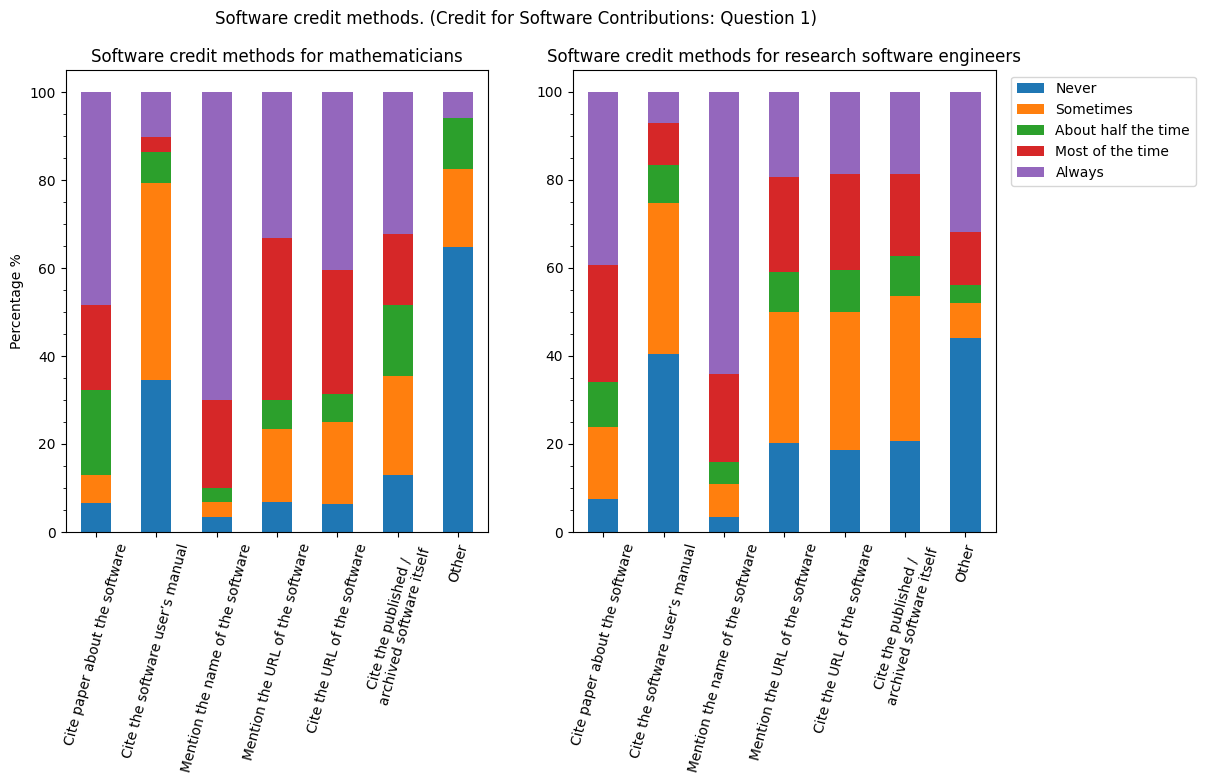

In [85]:
print_question_set("Q6.1", ["Cite paper about the software",
                            "Cite the software user’s manual", 
                            "Mention the name of the software", 
                            "Mention the URL of the software", 
                            "Cite the URL of the software", 
                            "Cite the published / archived software itself", 
                            "Other"])

questionID = "Q6.1"
title = 'Software credit methods. (Credit for Software Contributions: Question 1)'
figtitle1 = 'Software credit methods for mathematicians'
figtitle2 = 'Software credit methods for research software engineers'
STATEMENTS = ["Cite paper about the software",
              "Cite the software user’s manual", 
              "Mention the name of the software", 
              "Mention the URL of the software", 
              "Cite the URL of the software", 
              "Cite the published / \narchived software itself", 
              "Other"]
ANSWERS = ['Never',
           'Sometimes',
           'About half the time',
           'Most of the time',
           'Always']

# print raw data
#print_question_set(question=questionID, statements=STATEMENTS)
graph_likert_matrix(questionID=questionID, title=title, IRSEMsubtitle=figtitle1, URSSIsubtitle=figtitle2, statements=STATEMENTS, answers=ANSWERS, labelrotation=75)

##### Q6.2: How often do you currently receive the following types of credit for your software contributions? (if Developer or Combination selected)

|   | Never | Sometimes | About half the time | Most of the time | Always |
| - | - | - | - | - | - |
| **(Co)author on research paper** | o | o | o | o | o |
| **(Co)author on software paper** | o | o | o | o | o |
| **Acknowledgement in paper** | o | o | o | o | o |
| **Software cited in a paper** | o | o | o | o | o |
| **Funded/hired to work on the software** | o | o | o | o | o |
| **Other** | o | o | o | o | o |

(Co)author on research paper:

                  IRSEM survey: counts  percentages
Q6.2_1                                             
Sometimes                          8.0         0.47
Never                              4.0         0.24
Most of the time                   3.0         0.18
Always                             2.0         0.12
TOTAL:                            17.0         1.01

 - - - - -

                     URSSI survey: counts  percentages
Q6.2_1                                                
Sometimes                           133.0         0.33
Most of the time                     89.0         0.22
Never                                76.0         0.19
Always                               57.0         0.14
About half the time                  47.0         0.12
TOTAL:                              402.0         1.00

 _________________________________________________________ 

(Co)author on software paper:

                     IRSEM survey: counts  percentages
Q6.2

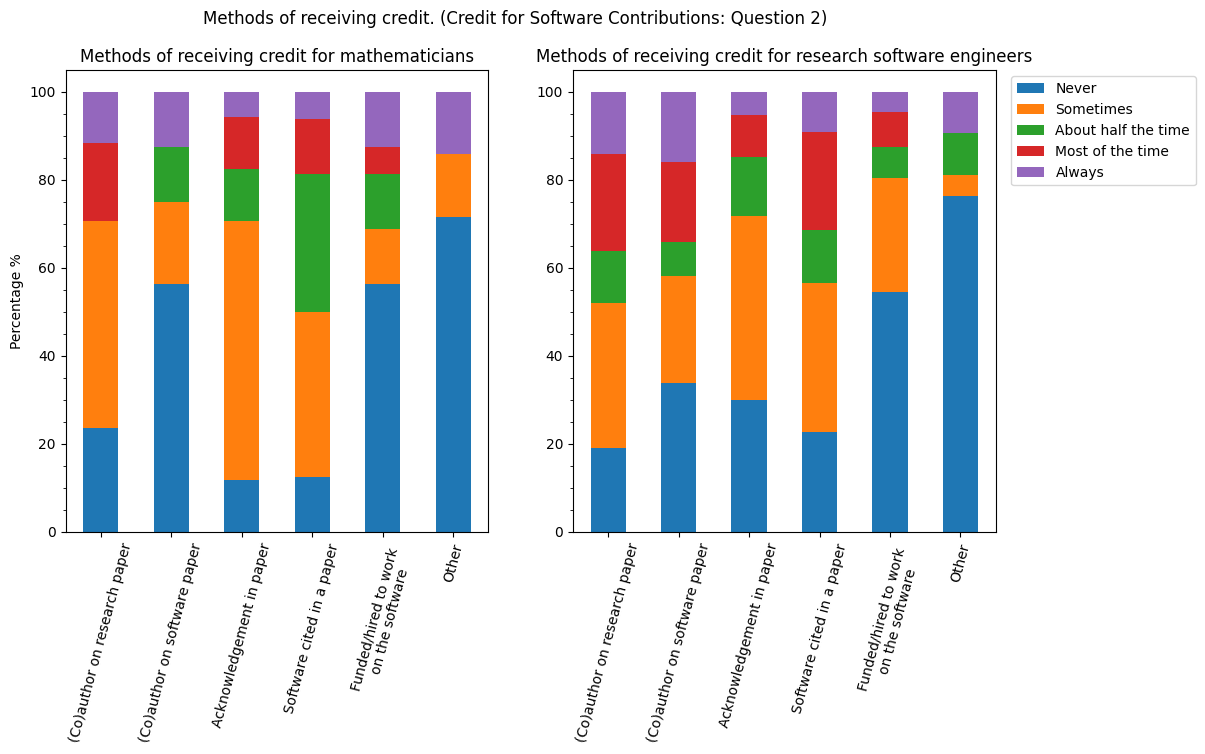

In [86]:
print_question_set("Q6.2", ["(Co)author on research paper",
                            "(Co)author on software paper", 
                            "Acknowledgement in paper", 
                            "Software cited in a paper", 
                            "Funded/hired to work on the software", 
                            "Other"])

questionID = "Q6.2"
title = 'Methods of receiving credit. (Credit for Software Contributions: Question 2)'
figtitle1 = 'Methods of receiving credit for mathematicians'
figtitle2 = 'Methods of receiving credit for research software engineers'
STATEMENTS = ["(Co)author on research paper",
              "(Co)author on software paper", 
              "Acknowledgement in paper", 
              "Software cited in a paper", 
              "Funded/hired to work \non the software", 
              "Other"]
ANSWERS = ['Never',
           'Sometimes',
           'About half the time',
           'Most of the time',
           'Always']

# print raw data
#print_question_set(question=questionID, statements=STATEMENTS)
graph_likert_matrix(questionID=questionID, title=title, IRSEMsubtitle=figtitle1, URSSIsubtitle=figtitle2, statements=STATEMENTS, answers=ANSWERS, labelrotation=75)

##### Q6.3: For your job role, does your institution allow software contributions to be considered in performance reviews or promotion cases?

Yes

No 

Dependent on the position (programmer vs. faculty)

In [87]:
print_question("Q6.3")

                                                    IRSEM survey: counts  \
Q6.3                                                                       
Dependent on the position (programmer vs. faculty)                  12.0   
Yes                                                                 10.0   
No                                                                   9.0   
TOTAL:                                                              31.0   

                                                    percentages  
Q6.3                                                             
Dependent on the position (programmer vs. faculty)         0.39  
Yes                                                        0.32  
No                                                         0.29  
TOTAL:                                                     1.00  

 - - - - -

                                                    URSSI survey: counts  \
Q6.3                                                      

##### Q6.4: How important do you believe software contributions are for your own performance review or promotion case?

Not at all important

Slightly important

Moderately important

Very important

Extremely important

In [88]:
print_question("Q6.4")

                      IRSEM survey: counts  percentages
Q6.4                                                   
Slightly important                    12.0         0.39
Moderately important                  11.0         0.35
Very important                         4.0         0.13
Extremely important                    2.0         0.06
Not at all important                   2.0         0.06
TOTAL:                                31.0         0.99

 - - - - -

                      URSSI survey: counts  percentages
Q6.4                                                   
Not at all important                 265.0         0.35
Slightly important                   197.0         0.26
Moderately important                 167.0         0.22
Very important                        80.0         0.11
Extremely important                   48.0         0.06
TOTAL:                               757.0         1.00


# RQ7: Diversity and Inclusion
How do current Research Software Projects document diversity statements and what support is needed to further diversity initiatives?

 Please answer the following questions based on the software project you work on most. If the questions do not apply, please select N/A.

##### Q7.1: How well does your project do the following:

|   | Terrible | Poor | Average | Good | Excellent | 🚫N/A |
| - | - | - | - | - | - | - |
| **Recruit participants from underrepresented groups** | o | o | o | o | o | o |
| **Retain participants from underrepresented groups** | o | o | o | o | o | o |
| **Include participants from underrepresented groups in governance and leadership positions** | o | o | o | o | o | o |
| **Maintain a culture of inclusion** | o | o | o | o | o | o |

Recruit participants from underrepresented groups:

          IRSEM survey: counts  percentages
Q7.1_1                                     
Average                   11.0         0.50
Poor                       9.0         0.41
Terrible                   1.0         0.05
Good                       1.0         0.05
TOTAL:                    22.0         1.01

 - - - - -

           URSSI survey: counts  percentages
Q7.1_1                                      
Average                   193.0         0.34
Good                      152.0         0.27
Poor                      103.0         0.18
Excellent                  91.0         0.16
Terrible                   24.0         0.04
TOTAL:                    563.0         0.99

 _________________________________________________________ 

Retain participants from underrepresented groups:

           IRSEM survey: counts  percentages
Q7.1_2                                      
Average                    10.0         0.48
Poor               

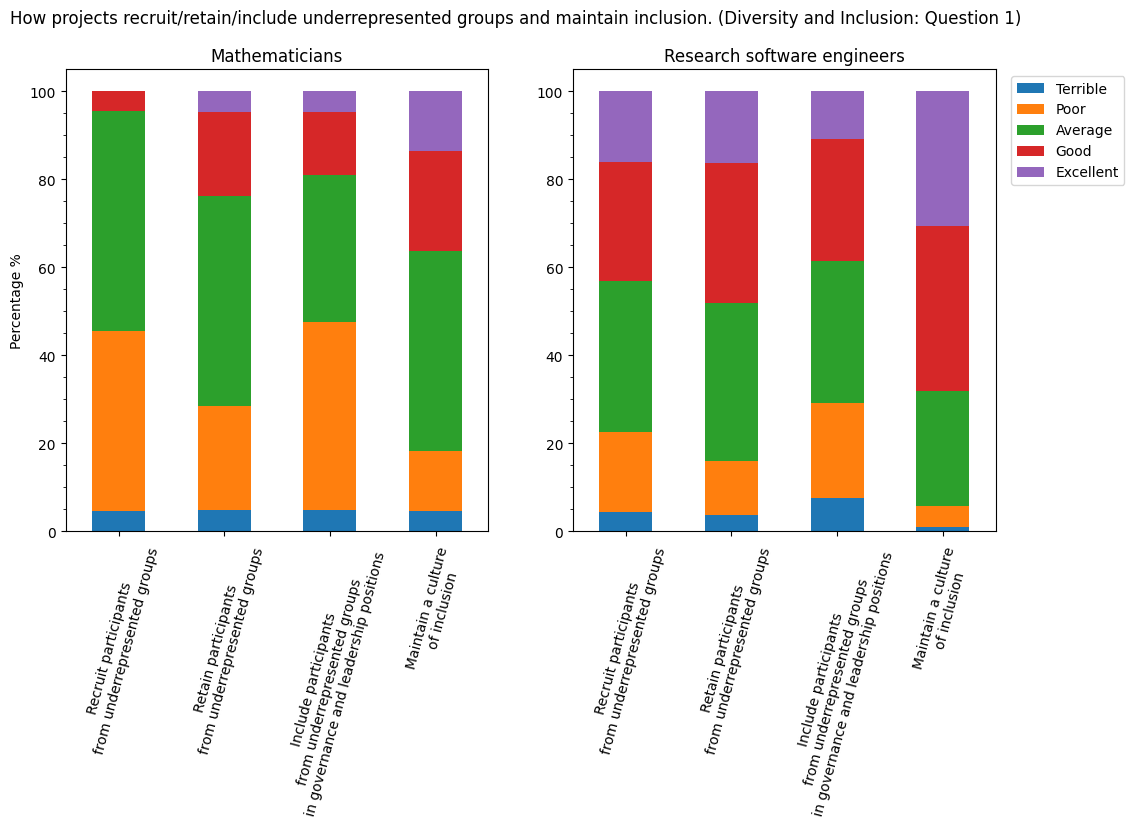

In [89]:
print_question_set("Q7.1", ["Recruit participants from underrepresented groups", 
                            "Retain participants from underrepresented groups", 
                            "Include participants from underrepresented groups in governance and leadership positions", 
                            "Maintain a culture of inclusion"])

questionID = "Q7.1"
title = 'How projects recruit/retain/include underrepresented groups and maintain inclusion. (Diversity and Inclusion: Question 1)'
figtitle1 = 'Mathematicians'
figtitle2 = 'Research software engineers'
STATEMENTS = ["Recruit participants \nfrom underrepresented groups", 
              "Retain participants \nfrom underrepresented groups", 
              "Include participants \nfrom underrepresented groups\n in governance and leadership positions", 
              "Maintain a culture \nof inclusion"]
ANSWERS = ['Terrible',
           'Poor',
           'Average',
           'Good',
           'Excellent']

# print raw data
#print_question_set(question=questionID, statements=STATEMENTS)
graph_likert_matrix(questionID=questionID, title=title, IRSEMsubtitle=figtitle1, URSSIsubtitle=figtitle2, statements=STATEMENTS, answers=ANSWERS, labelrotation=75)

##### Q7.2: What are the challenges you face in creating / maintaining a culture of inclusion?

Text input

In [90]:
print_question("Q7.2")

                                                    IRSEM survey: counts  \
Q7.2                                                                       
Few qualified applicants from underrepresented ...                   1.0   
This is not important if your focus is on creat...                   1.0   
Very few mathematicians in underrepresented groups                   1.0   
N/A. I have no idea what race, age, gender, etc...                   1.0   
When bringing new people on, there is quite a b...                   1.0   
Inclusion is not discussed that much in my country                   1.0   
Finding qualified applicants.                                        1.0   
I think one individual can often be extremely h...                   1.0   
the challenges mainly boil down to a few opinio...                   1.0   
racial bias for interest in programming                              1.0   
recruitment                                                          1.0   
TOTAL:      

##### Q7.3: Does your project do any measurement, tracking, or analysis of developer or user communities - with regard to diversity and/or inclusion? If so, please describe below.

Text input

In [91]:
print_question("Q7.3")

                                                    IRSEM survey: counts  \
Q7.3                                                                       
no                                                                   2.0   
I'm extremely glad they don't, the notion strik...                   1.0   
No                                                                   1.0   
TOTAL:                                                               4.0   

                                                    percentages  
Q7.3                                                             
no                                                         0.50  
I'm extremely glad they don't, the notion strik...         0.25  
No                                                         0.25  
TOTAL:                                                     1.00  

 - - - - -

                                                    URSSI survey: counts  \
Q7.3                                                      